In [2]:
# importing dependencies

%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib
import numpy as np; np.random.seed(2223)
import pandas as pd
import datetime as dt
import matplotlib.style as style
style.available
import seaborn as sns


# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect,desc, func

# Reflect Tables into SQLAlchemy ORM

In [3]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [4]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(engine, reflect=True)

In [5]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [6]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [7]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [8]:
# finding columns of tables
inspector = inspect(engine)
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [9]:
# finding columns of tables
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [10]:
# Find the most recent date in the data set.
last_date = session.query(Measurement.date).order_by(desc('date')).first()
last_date


('2017-08-23')

In [11]:
# creating date time objects of first and last date required
date1 = dt.datetime(2017,8,23)
date2 = dt.datetime(2016,8,23)

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Perform a query to retrieve the data and precipitation scores


prec_1_year = session.query(Measurement.prcp, Measurement.date).filter(Measurement.date>date2).filter(Measurement.date<date1).all()
# prec_1_year


In [13]:
# Save the query results as a Pandas DataFrame and set the index to the date column
prec_1_year_df = pd.DataFrame(prec_1_year, columns=['precipitation', 'Date'])
prec_1_year_df.set_index('Date')

# Convert object type to datetime object
prec_1_year_df["Date"] = prec_1_year_df["Date"].astype('datetime64[ns]')

In [14]:
# Sort the dataframe by date
prec_1_year_df.sort_values(by='Date', ascending = False, inplace = True)
print(prec_1_year_df.to_string())

      precipitation       Date
2222           11.4 2017-08-23
1523            2.0 2017-08-23
1005            0.0 2017-08-23
359             0.0 2017-08-23
1522            0.0 2017-08-22
2221           12.7 2017-08-22
358             0.0 2017-08-22
2220           14.2 2017-08-21
1004            0.5 2017-08-21
1521            NaN 2017-08-21
357             0.0 2017-08-21
1003            0.3 2017-08-20
2219            NaN 2017-08-20
356             0.0 2017-08-20
2218            2.3 2017-08-19
1520            NaN 2017-08-19
355             0.0 2017-08-19
1002            0.0 2017-08-19
1001            0.0 2017-08-18
1874            1.5 2017-08-18
354             0.0 2017-08-18
2217            NaN 2017-08-18
1519            1.3 2017-08-17
1000            0.0 2017-08-17
1873            0.3 2017-08-17
2216            3.3 2017-08-17
2215           10.7 2017-08-16
1518            1.8 2017-08-16
999             0.0 2017-08-16
1872            3.0 2017-08-16
998             0.0 2017-08-15
2214    

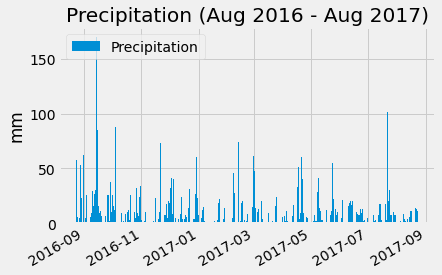

In [15]:
# Use Pandas Plotting with Matplotlib to plot the data
df = pd.DataFrame(np.cumsum(np.random.randn(2223)), 
                  columns=['precipitation'], index=pd.to_datetime(prec_1_year_df["Date"]))

plt.bar(df.index, prec_1_year_df["precipitation"].values)
plt.gcf().autofmt_xdate()
plt.rcParams["figure.figsize"] = (20,15)
plt.ylabel("mm")
leg = ['Precipitation']
plt.legend(leg,loc='upper left')
plt.title("Precipitation (Aug 2016 - Aug 2017)")
plt.show()

In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data

mean = prec_1_year_df["precipitation"].mean()
median = prec_1_year_df["precipitation"].median()

print(f"The mean and median precipitation for last year is \n* Mean * Precipitation: {mean} mm \n* Median * Precipitation: {median} mm")

The mean and median precipitation for last year is 
* Mean * Precipitation: 4.4851116625310175 mm 
* Median * Precipitation: 0.5 mm


# Exploratory Station Analysis

In [17]:
# converting Station table into a Dataframe
stations_list = session.query(Station.id ,Station.name, Station.station, Station.longitude, Station.latitude, Station.elevation).all()
stations_list_df = pd.DataFrame(stations_list, columns=["id", "name", "station", "longitude", "latitude", "elevation"])
stations_list_df.set_index('id', inplace=True)
stations_list_df

,name,station,longitude,latitude,elevation
id,,,,,
0,"WAIKIKI 717.2, HI US",USC00519397,-157.81680,21.27160,0.914
1,"KANEOHE 838.1, HI US",USC00513117,-157.80150,21.42340,4.450
2,"KUALOA RANCH HEADQUARTERS 886.9, HI US",USC00514830,-157.83740,21.52130,2.133
3,"PEARL CITY, HI US",USC00517948,-157.97510,21.39340,3.627
4,"UPPER WAHIAWA 874.3, HI US",USC00518838,-158.01110,21.49920,93.447
5,"WAIMANALO EXPERIMENTAL FARM, HI US",USC00519523,-157.71139,21.33556,5.943
6,"WAIHEE 837.5, HI US",USC00519281,-157.84889,21.45167,10.027
7,"HONOLULU OBSERVATORY 702.2, HI US",USC00511918,-157.99920,21.31520,0.274
8,"MANOA LYON ARBO 785.2, HI US",USC00516128,-157.80250,21.33310,46.449


In [18]:
# Design a query to calculate the total number stations in the dataset

# calculating through pandas
len(stations_list_df)


# calculating through SQLAlchemy
stations_count = session.query(Station.id).count()
stations_count

9

In [19]:

measurements_list = session.query(Measurement.id, Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).all()
measurements_df = pd.DataFrame(measurements_list, columns=["id", "station", "date", "prcp", "tobs"])
measurements_df


,id,station,date,prcp,tobs
0,0,USC00519397,2010-01-01,2.0,18.3
1,1,USC00519397,2010-01-02,0.0,17.2
2,2,USC00519397,2010-01-03,0.0,23.3
3,3,USC00519397,2010-01-04,0.0,24.4
4,4,USC00519397,2010-01-06,NaN,22.8
...,...,...,...,...,...
19545,19545,USC00516128,2017-08-19,2.3,21.7
19546,19546,USC00516128,2017-08-20,NaN,25.6
19547,19547,USC00516128,2017-08-21,14.2,24.4
19548,19548,USC00516128,2017-08-22,12.7,24.4


In [20]:
measurements_stations_df = measurements_df.groupby('station').count()
measurements_stations_df

,id,date,prcp,tobs
station,,,,
USC00511918,1979,1979,1932,1979
USC00513117,2709,2709,2696,2709
USC00514830,2202,2202,1937,2202
USC00516128,2612,2612,2484,2612
USC00517948,1372,1372,683,1372
USC00518838,511,511,342,511
USC00519281,2772,2772,2772,2772
USC00519397,2724,2724,2685,2724
USC00519523,2669,2669,2572,2669


In [21]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# finding bussiest station
bussiest_station = measurements_stations_df['id'].idxmax()
bussiest_station

'USC00519281'

In [22]:
# List the stations and the counts in descending order.
measurements_stations_df.sort_values(by=['id'], ascending=False)

,id,date,prcp,tobs
station,,,,
USC00519281,2772,2772,2772,2772
USC00519397,2724,2724,2685,2724
USC00513117,2709,2709,2696,2709
USC00519523,2669,2669,2572,2669
USC00516128,2612,2612,2484,2612
USC00514830,2202,2202,1937,2202
USC00511918,1979,1979,1932,1979
USC00517948,1372,1372,683,1372
USC00518838,511,511,342,511


In [23]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

# grouped_stations_df = measurements_df.groupby('station')

# grouped_stations_df.head()

bussiest_station_df = measurements_df.loc[measurements_df['station'] == bussiest_station]
bussiest_station_df

,id,station,date,prcp,tobs
12187,12187,USC00519281,2010-01-01,3.8,21.1
12188,12188,USC00519281,2010-01-02,0.0,16.7
12189,12189,USC00519281,2010-01-03,0.0,23.3
12190,12190,USC00519281,2010-01-04,0.0,23.9
12191,12191,USC00519281,2010-01-05,0.0,23.3
...,...,...,...,...,...
14954,14954,USC00519281,2017-08-14,0.0,25.0
14955,14955,USC00519281,2017-08-15,8.1,25.0
14956,14956,USC00519281,2017-08-16,3.0,24.4
14957,14957,USC00519281,2017-08-17,0.3,24.4


In [24]:
# highest temp

highest_temp = bussiest_station_df['tobs'].max()
highest_temp

29.4

In [25]:
# lowest temp

lowest_temp = bussiest_station_df['tobs'].min()
lowest_temp

12.2

In [26]:
# average temp
mean_temp = bussiest_station_df['tobs'].mean()
mean_temp

22.035822510822513

In [44]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station

bussiest_station_1_year_df = bussiest_station_df[(bussiest_station_df['date'] >= '2016-1-1') & (bussiest_station_df['date'] <= '2017-8-18')]
bussiest_station_1_year_df = bussiest_station_1_year_df[["date", "tobs"]]
bussiest_station_1_year_df

,date,tobs
14646,2016-10-01,25.0
14647,2016-10-02,26.1
14648,2016-10-03,26.1
14649,2016-10-04,26.1
14650,2016-10-05,26.1
...,...,...
14954,2017-08-14,25.0
14955,2017-08-15,25.0
14956,2017-08-16,24.4
14957,2017-08-17,24.4


Text(0.5, 0, 'Temperature')

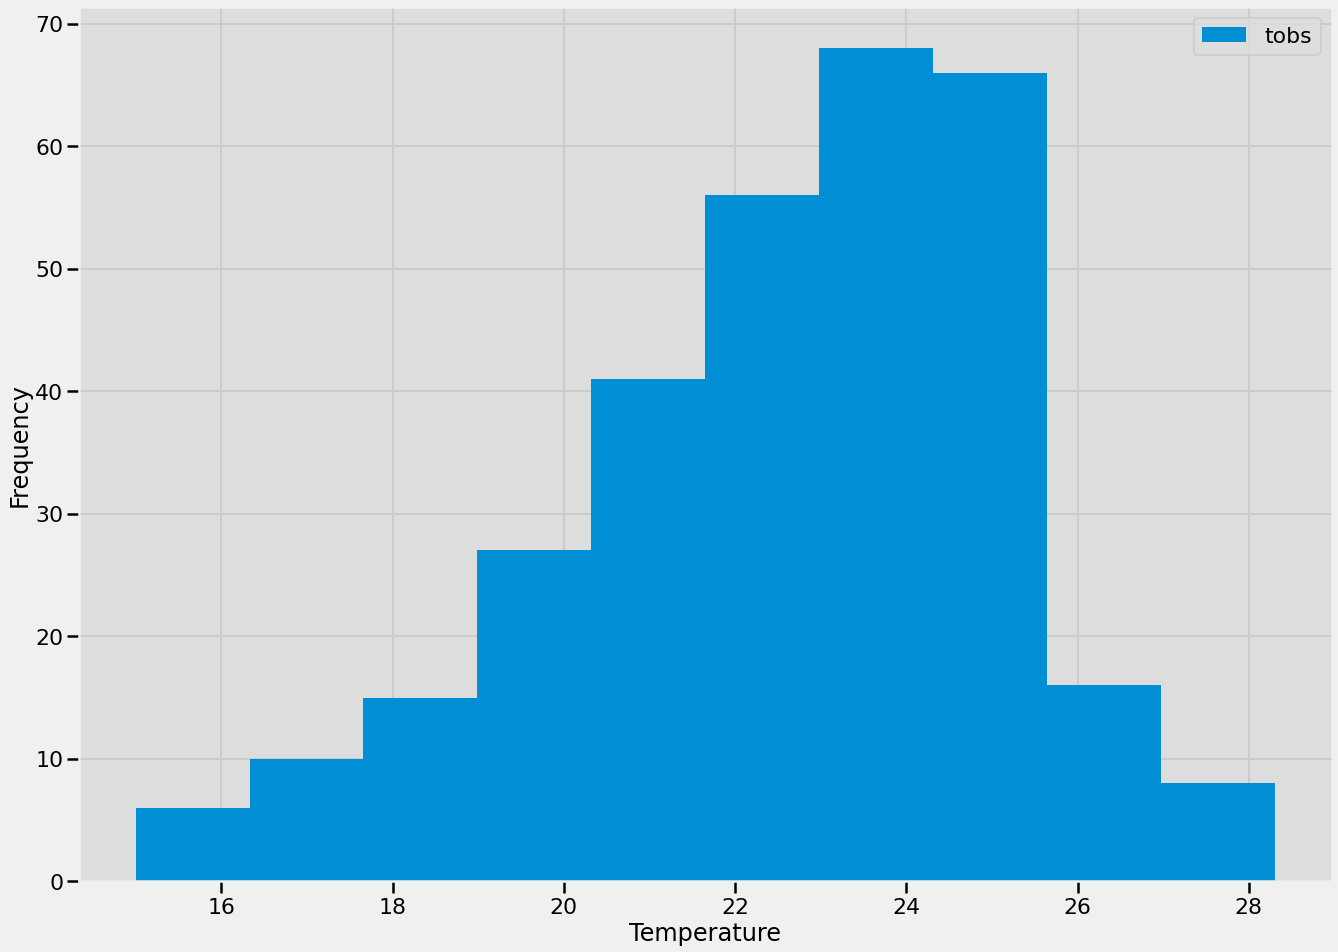

In [41]:
x = bussiest_station_1_year_df.plot(kind='hist', y='tobs')
x.set_xlabel('Temperature')

[Text(0.5, 1.0, ' Oct 16 - Aug 17 temperature observations of station# USC00519281')]

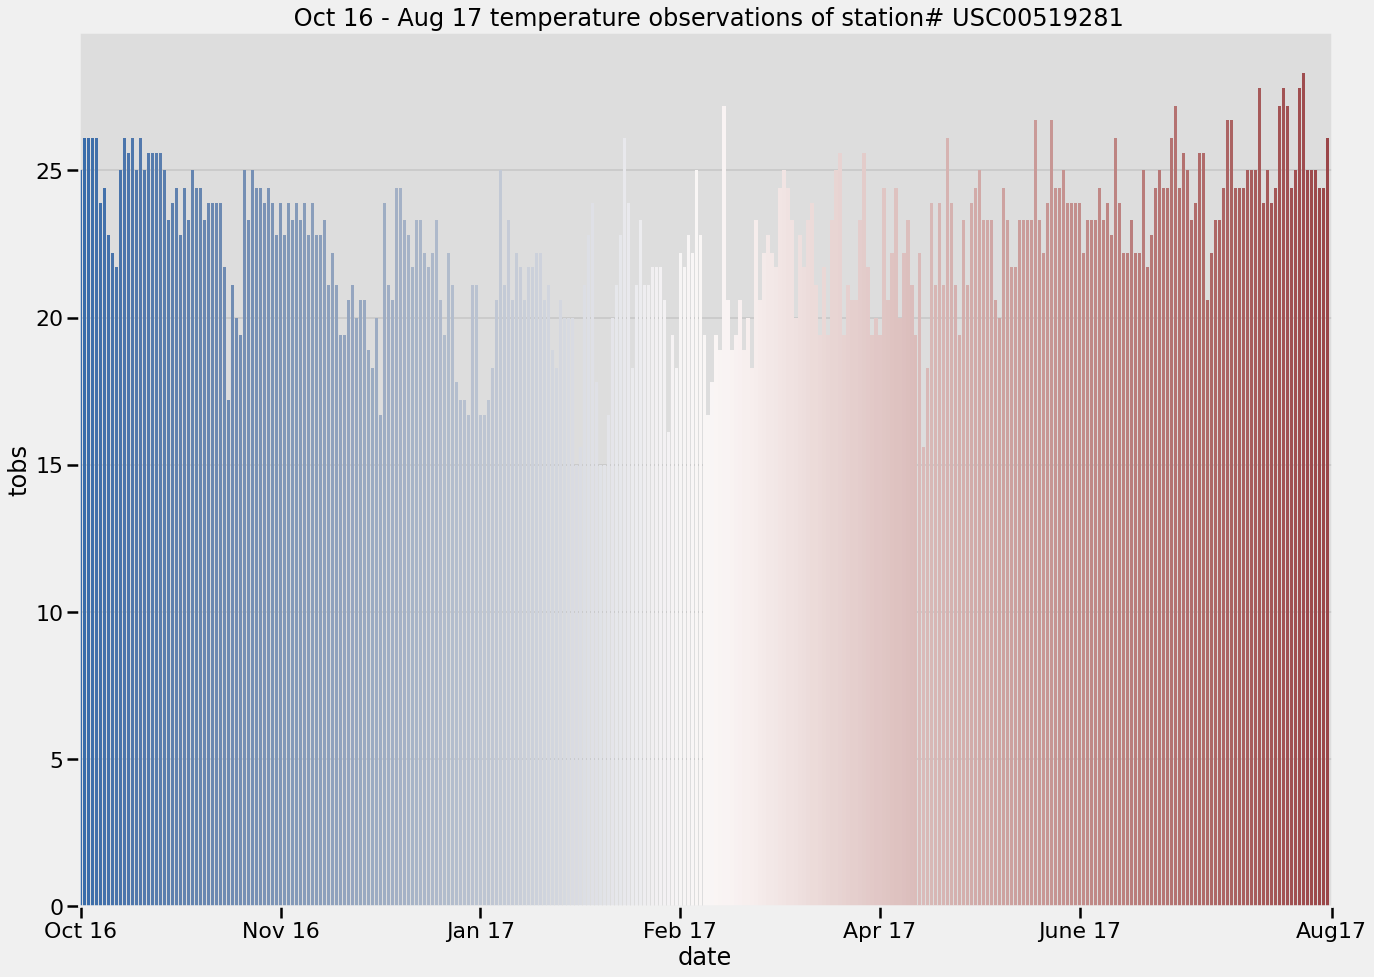

In [42]:
# plot the results as a histogram

sns.set_context("poster")
sns.set_style(rc = {'axes.facecolor': '#DDDDDD'})
ax = sns.barplot(y= "tobs", x = "date", data = bussiest_station_1_year_df, palette=("vlag"))
ax.set_xticks([0, 50, 100, 150, 200, 250, 313])
ax.set(xticklabels=(['Oct 16','Nov 16','Jan 17','Feb 17', 'Apr 17', 'June 17', 'Aug17']))
ax.set(title=' Oct 16 - Aug 17 temperature observations of station# USC00519281')

# Close session

In [43]:
# Close Session
session.close()